# Moving Average Process an Using ARIMA to Forecast

In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

## Simulate MA(2) process 

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

In [3]:
ma2 = np.array([1, 0.9, 0.3])
ar2 = np.array([1, 0, 0])

print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [4]:
# Gerando uma TimeSeries
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

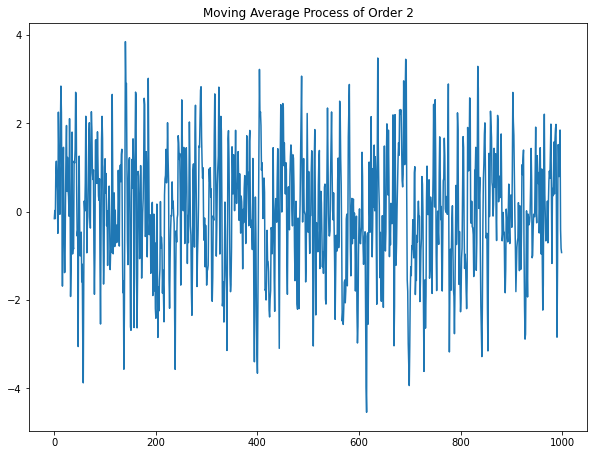

In [5]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

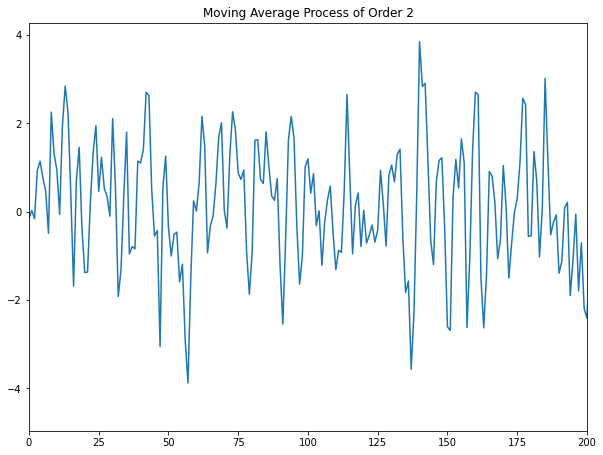

In [6]:
# Dando um Zoom no gráfica para ver que é uma MA(2) ou seja,
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

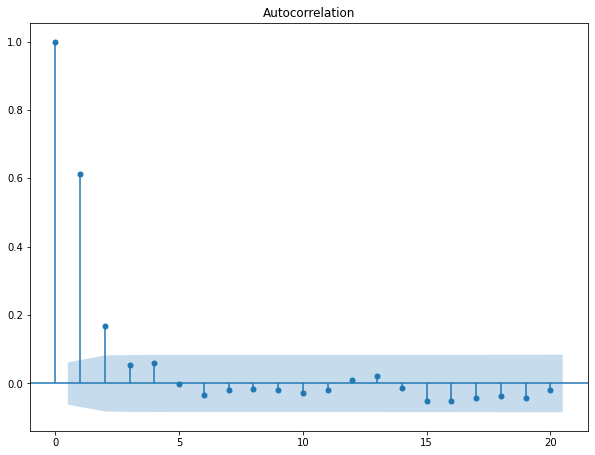

In [7]:
# Plotando a ACF, como já sabemos, nao vemos correlaçao apos o lag/instante/momento 2
plot_acf(MA2_process, lags=20);

Com a ACF podmeos confirmar que é uma MA(2) ou seja, Após dois lags perde a autocorrelaçâo. Se isso acontece nos instantes t0, t1, e t2 entao acontece a cada 2 pontos em toda a Series, assim é uma série Estácionaria.

Vamos entâo tentar voltar aoss parametros que definimos para ssim sermos capazes de prever essa time series. Usaremos a ARIMA(0,0,2) onde 2 é essa ordem

## Resolvendo uma MA(2)

In [8]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1418.793
Date:                Fri, 05 Mar 2021   AIC                           2845.586
Time:                        23:48:44   BIC                           2865.205
Sample:                             0   HQIC                          2853.043
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0253      0.071     -0.356      0.722      -0.164       0.114
ma.L1          0.9159      0.030     30.997      0.000       0.858       0.974
ma.L2          0.3132      0.031     10.219      0.0

Em ma.L1, ma.L2 e sigma2 obtmeos valores como os parametros definimos anteriomente